#Обработка на податоците од GDELT

In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Податочни множества од BigQuery

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/bq-results-Q1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/bq-results-Q2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/bq-results-Q3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/DIPLOMSKA/GDELT/bq-results-Q4.csv')

In [ ]:
df1_cl = df1.dropna()
df2_cl = df2.dropna()
df3_cl = df3.dropna()
df4_cl = df4.dropna()

## Претпроцесирање на податоците - Отстранување на вредностите од SOURCEURL кои не водат до линк и на дупликати од податочното множество.


In [ ]:
datasets = [df1, df2, df3, df4]
filenames = ['dataset1_cleaned.csv', 'dataset2_cleaned.csv', 'dataset3_cleaned.csv', 'dataset4_cleaned.csv']
cleaned_datasets = []

for i, (df, filename) in enumerate(zip(datasets, filenames), start=1):
    data_cleaned = df.drop_duplicates(subset=['SOURCEURL'])
    data_cleaned = data_cleaned[data_cleaned['SOURCEURL'].str.startswith("http", na=False)]
    data_cleaned.reset_index(drop=True, inplace=True)

    data_cleaned.to_csv(filename, index=False)
    cleaned_datasets.append(data_cleaned)

    removed_rows = len(df) - len(data_cleaned)
    print(f"Dataset {i} - Remaining rows: {len(data_cleaned)}, Rows removed: {removed_rows}")

data_cleaned1, data_cleaned2, data_cleaned3, data_cleaned4 = cleaned_datasets


Dataset 1 - Remaining rows: 88385, Rows removed: 86143
Dataset 2 - Remaining rows: 99557, Rows removed: 100434
Dataset 3 - Remaining rows: 87394, Rows removed: 88634
Dataset 4 - Remaining rows: 78638, Rows removed: 79917


In [ ]:
data_cleaned1.head(10)

,GlobalEventID,EventCode,GoldsteinScale,AvgTone,ActionGeo_CountryCode,SOURCEURL
0,1029155021,203,-10.0,-2.275449,US,https://www.theguardian.com/commentisfree/2022...
1,1029216530,144,-7.5,-2.345416,US,https://wusfnews.wusf.usf.edu/weather/2022-02-...
2,1029161417,203,-10.0,1.091703,US,https://news.yahoo.com/word-smokies-african-am...
3,1029134955,144,-7.5,-1.403888,US,https://www.lajollalight.com/news/story/2022-0...
4,1029214924,202,-10.0,-0.436047,US,https://bwog.com/2022/02/beyond-batman-and-bla...
5,1029206657,1411,-6.5,-4.545455,US,http://twocircles.net/2022feb19/445112.html
6,1029126794,144,-7.5,-11.178248,US,https://www.kcra.com/article/interstate-80-wes...
7,1029229138,144,-7.5,-2.545455,US,https://www.msn.com/en-us/news/politics/minnes...
8,1028009756,144,-7.5,-7.077425,US,https://www.postbulletin.com/news/world/canada...
9,1028018005,144,-7.5,-6.645845,US,https://pmnewsnigeria.com/2022/02/12/protester...


In [ ]:
merged_data.isnull().sum()

,0
GlobalEventID,0
EventCode,0
GoldsteinScale,0
AvgTone,0
ActionGeo_CountryCode,0
SOURCEURL,0


In [ ]:
value_counts = merged_data['SOURCEURL'].value_counts()
print(value_counts)

In [ ]:
has_duplicates = data_cleaned['SOURCEURL'].duplicated().any()

if has_duplicates:
    print("There are duplicates in the 'SOURCEURL' column.")
else:
    print("No duplicates found in the 'SOURCEURL' column.")

No duplicates found in the 'SOURCEURL' column.


In [ ]:
data_cleaned.head(100)

,GlobalEventID,EventCode,GoldsteinScale,AvgTone,ActionGeo_CountryCode,SOURCEURL
0,1029155021,203,-10.0,-2.275449,US,https://www.theguardian.com/commentisfree/2022...
1,1029216530,144,-7.5,-2.345416,US,https://wusfnews.wusf.usf.edu/weather/2022-02-...
2,1029161417,203,-10.0,1.091703,US,https://news.yahoo.com/word-smokies-african-am...
3,1029134955,144,-7.5,-1.403888,US,https://www.lajollalight.com/news/story/2022-0...
4,1029214924,202,-10.0,-0.436047,US,https://bwog.com/2022/02/beyond-batman-and-bla...
...,...,...,...,...,...,...
95,1025405811,202,-10.0,-2.768976,US,https://isp.netscape.com/news/story/0001/20220...
96,1025410809,202,-10.0,-2.835333,US,https://www.oklahoman.com/story/news/2022/01/2...
97,1026886107,144,-7.5,-0.740741,US,https://tulsaworld.com/news/local/history/thro...
98,1026831040,144,-7.5,-5.806938,US,https://www.washingtonpost.com/nation/2022/02/...


In [ ]:
#data_cleaned.to_csv('/content/drive/MyDrive/DIPLOMSKA/cleaned_datasetGDELT.csv', index=False)

## Heatmap на податочното множество и дополнителна анализа за понатамошна обработка

In [ ]:
le = LabelEncoder()
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        data_cleaned[column] = le.fit_transform(data_cleaned[column])

In [ ]:
stat_desc = data_cleaned.describe()
print(stat_desc)

       GlobalEventID      EventCode  GoldsteinScale        AvgTone
count   3.536230e+05  353623.000000   353623.000000  353623.000000
mean    1.051438e+09     179.561383       -8.250585      -4.084732
std     1.844243e+07      27.468496        2.233184       3.782728
min     1.021420e+09     141.000000      -10.000000     -43.333333
25%     1.037419e+09     172.000000      -10.000000      -6.451613
50%     1.051102e+09     190.000000      -10.000000      -3.984064
75%     1.064876e+09     190.000000       -5.000000      -1.642512
max     1.149154e+09    1431.000000       -5.000000      19.327731


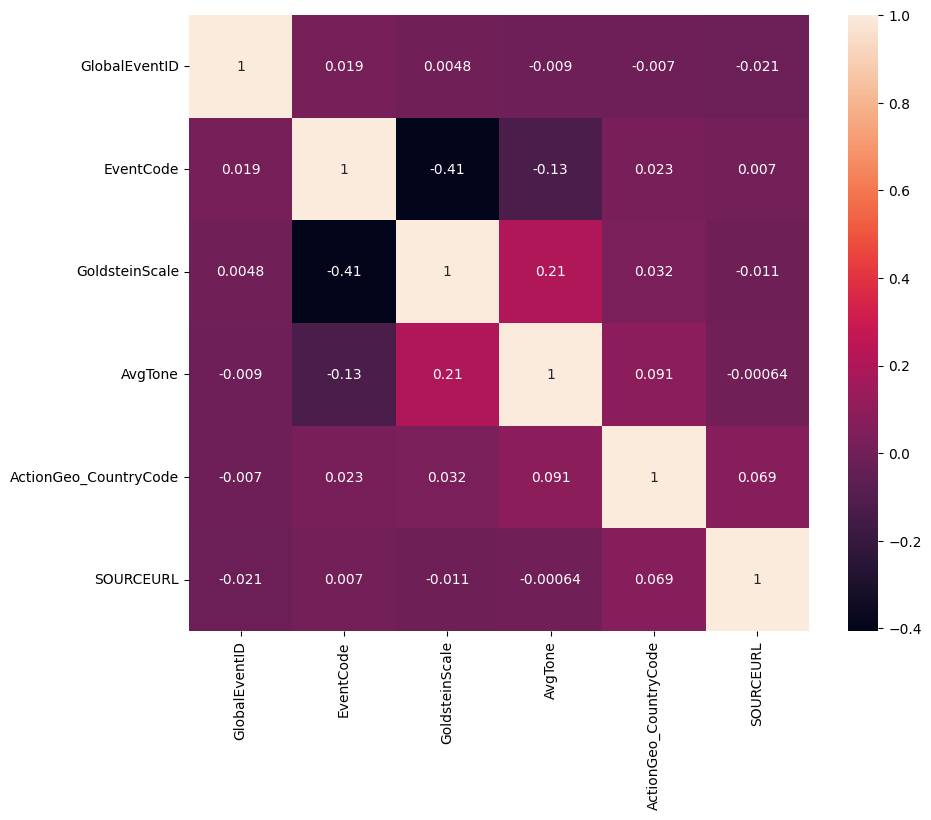

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data_cleaned.corr(), annot = True)
plt.show()

In [ ]:
df_sample = data_cleaned.sample(frac=0.1, random_state=42)  # Земаме 10% од податоците
df_sample.corr()

,GlobalEventID,EventCode,GoldsteinScale,AvgTone,ActionGeo_CountryCode,SOURCEURL
GlobalEventID,1.000000,0.022552,0.013839,-0.002580,-0.008319,-0.013687
EventCode,0.022552,1.000000,-0.438977,-0.135345,0.026990,0.002480
GoldsteinScale,0.013839,-0.438977,1.000000,0.207431,0.034580,-0.011349
AvgTone,-0.002580,-0.135345,0.207431,1.000000,0.096764,0.002744
ActionGeo_CountryCode,-0.008319,0.026990,0.034580,0.096764,1.000000,0.070582
SOURCEURL,-0.013687,0.002480,-0.011349,0.002744,0.070582,1.000000


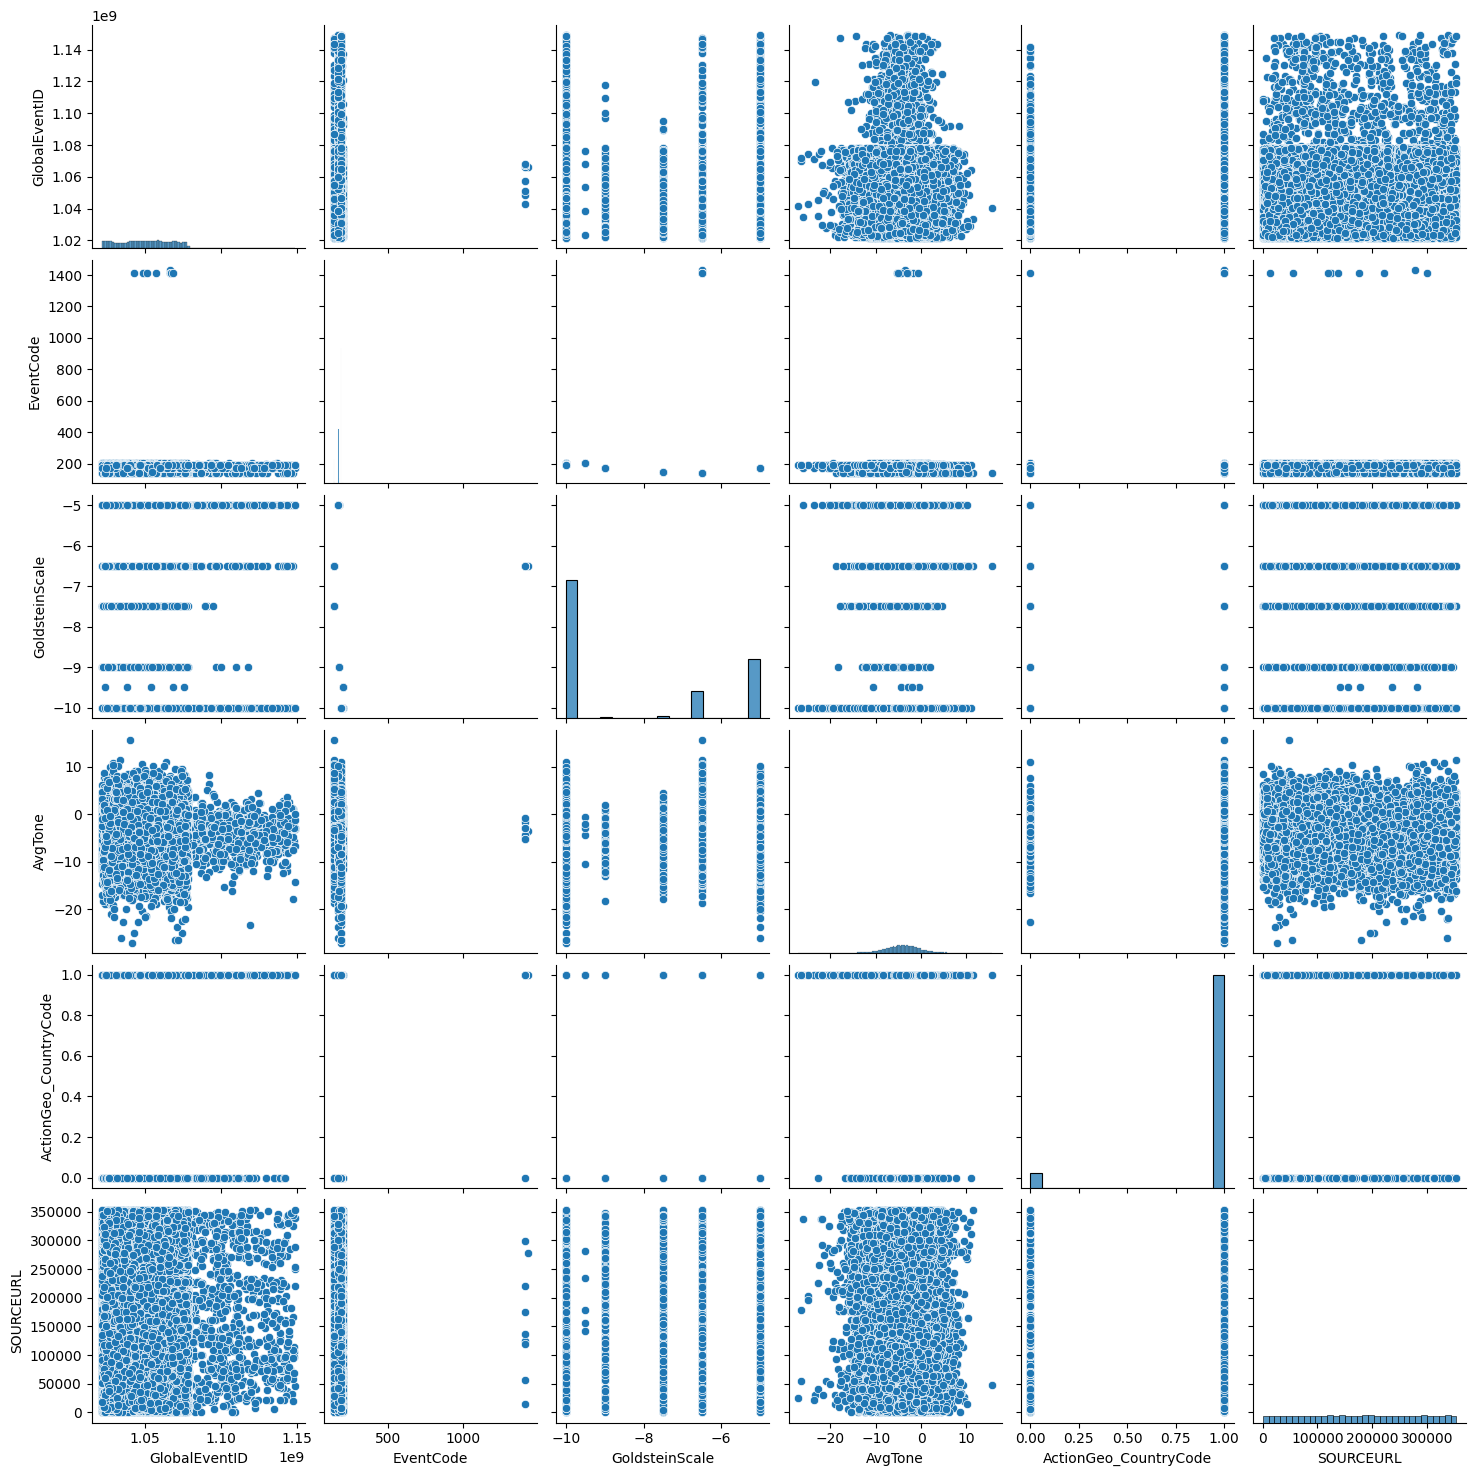

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_sample)
plt.show()